<a href="https://colab.research.google.com/github/S1o2u3/Gender-Classification-Using-Alexnet/blob/main/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision import models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
'''# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
'''

'# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"\n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n'

In [ ]:
train_path = '/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'
test_path = '/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'
val_path='/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'

In [ ]:
img_width = 227
img_height = 227
batch_size = 20

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 795 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_path,
                                                 target_size=(img_width, img_height),
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 795 images belonging to 2 classes.


In [ ]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

In [ ]:
print(train_generator.class_indices)

{'FEMALE': 0, 'MALE': 1}


In [ ]:
for a, value in train_generator.class_indices.items():
    print(f'{a} : {value}')

FEMALE : 0
MALE : 1


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train_generator.image_shape

(227, 227, 3)

In [ ]:
print(train_generator[0][1][0])

[0. 1.]


In [ ]:
labels = {value: a for a, value in train_generator.class_indices.items()}

print(labels)

{0: 'FEMALE', 1: 'MALE'}


In [ ]:
train_generator[0][0][0] , train_generator[0][1][0]

(array([[[0.29837978, 0.29837978, 0.29837978],
         [0.29837978, 0.29837978, 0.29837978],
         [0.29837978, 0.29837978, 0.29837978],
         ...,
         [0.2520723 , 0.2520723 , 0.2520723 ],
         [0.2520723 , 0.2520723 , 0.2520723 ],
         [0.2520723 , 0.2520723 , 0.2520723 ]],
 
        [[0.28291577, 0.28291577, 0.28291577],
         [0.28291577, 0.28291577, 0.28291577],
         [0.28291577, 0.28291577, 0.28291577],
         ...,
         [0.2784494 , 0.2784494 , 0.2784494 ],
         [0.2784494 , 0.2784494 , 0.2784494 ],
         [0.2784494 , 0.2784494 , 0.2784494 ]],
 
        [[0.28668392, 0.28668392, 0.28668392],
         [0.28668392, 0.28668392, 0.28668392],
         [0.28668392, 0.28668392, 0.28668392],
         ...,
         [0.29377306, 0.29377306, 0.29377306],
         [0.29377306, 0.29377306, 0.29377306],
         [0.29377306, 0.29377306, 0.29377306]],
 
        ...,
 
        [[0.32156864, 0.32156864, 0.32156864],
         [0.32156864, 0.32156864, 0.32156

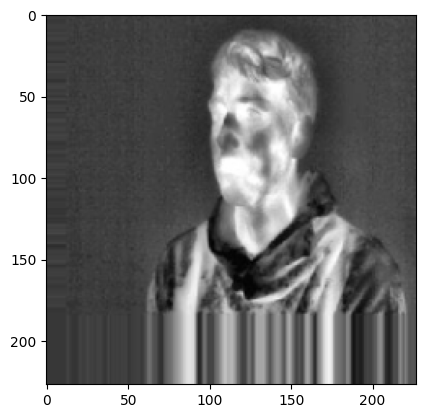

In [ ]:
plt.imshow(train_generator[0][0][0])
plt.show()

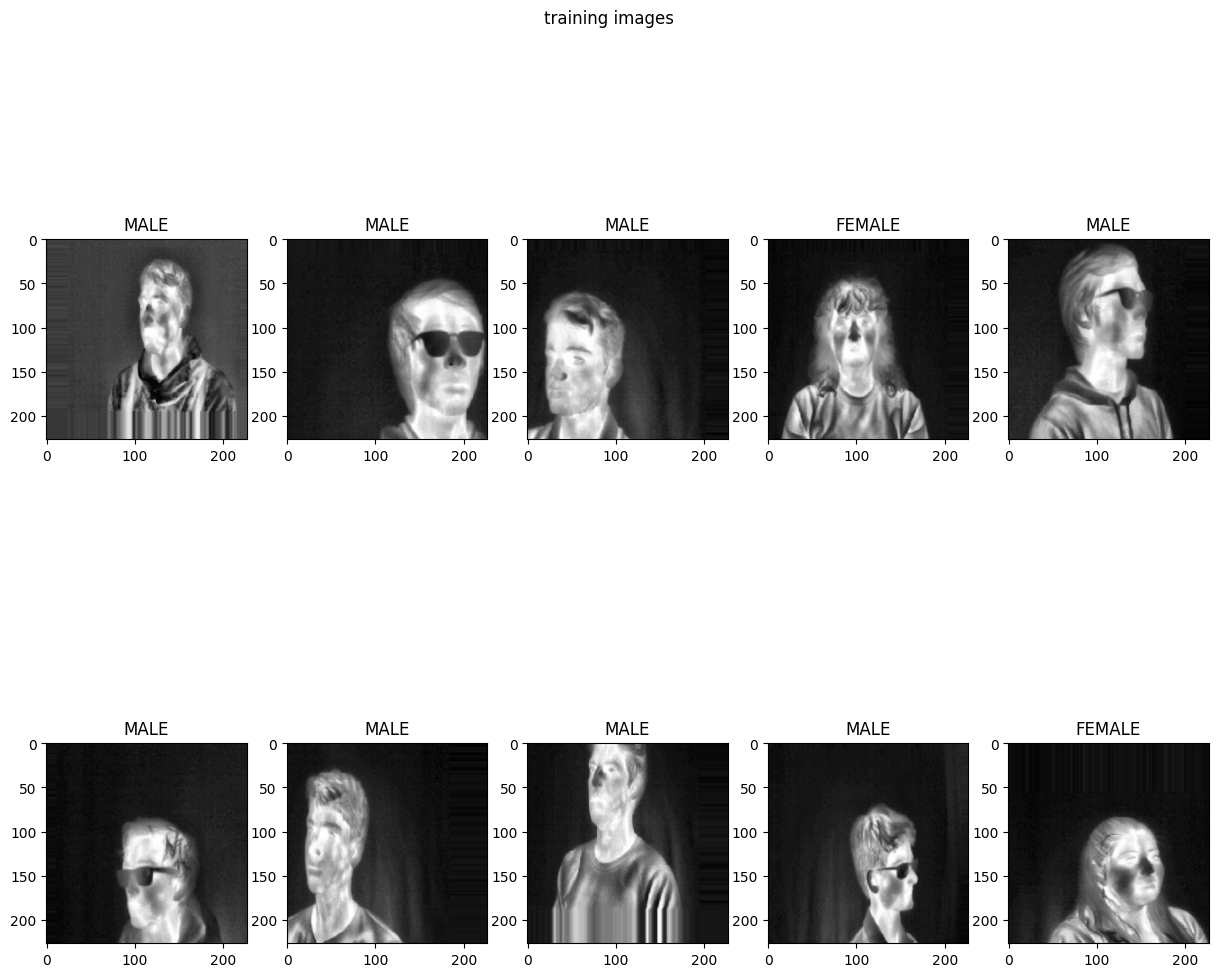

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f'{label}')
        ax[i, j].imshow(train_generator[0][0][idx])
        idx += 1
plt.suptitle('training images')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(img_width, img_height, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.01)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),

        Conv2D(filters=32, kernel_size=(2, 2), padding='valid', kernel_regularizer=l2(0.01)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
#         Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 128)     9728      
                                                                 
 activation (Activation)     (None, 223, 223, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 128)     512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 128)     9728      
                                                                 
 activation (Activation)     (None, 223, 223, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 128)     512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your training and testing data directories
train_directory = '/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'
test_directory = '/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'
val_directory='/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'

# Create an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for training data
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for test data
test_generator = test_datagen.flow_from_directory(
        test_directory,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# Define a simple convolutional neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(train_generator, epochs=5, validation_data=test_generator, verbose=2, callbacks=[reduce_lr])


Found 795 images belonging to 2 classes.
Found 795 images belonging to 2 classes.


Epoch 1/5
25/25 - 70s - loss: 0.9629 - accuracy: 0.5698 - val_loss: 0.6409 - val_accuracy: 0.6126 - lr: 0.0010 - 70s/epoch - 3s/step
Epoch 2/5
25/25 - 69s - loss: 0.6425 - accuracy: 0.6289 - val_loss: 0.6005 - val_accuracy: 0.6516 - lr: 0.0010 - 69s/epoch - 3s/step
Epoch 3/5
25/25 - 68s - loss: 0.5869 - accuracy: 0.6994 - val_loss: 0.5198 - val_accuracy: 0.7723 - lr: 0.0010 - 68s/epoch - 3s/step
Epoch 4/5
25/25 - 68s - loss: 0.5032 - accuracy: 0.7509 - val_loss: 0.4099 - val_accuracy: 0.8151 - lr: 0.0010 - 68s/epoch - 3s/step
Epoch 5/5
25/25 - 61s - loss: 0.3945 - accuracy: 0.8264 - val_loss: 0.3250 - val_accuracy: 0.8591 - lr: 0.0010 - 61s/epoch - 2s/step


In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

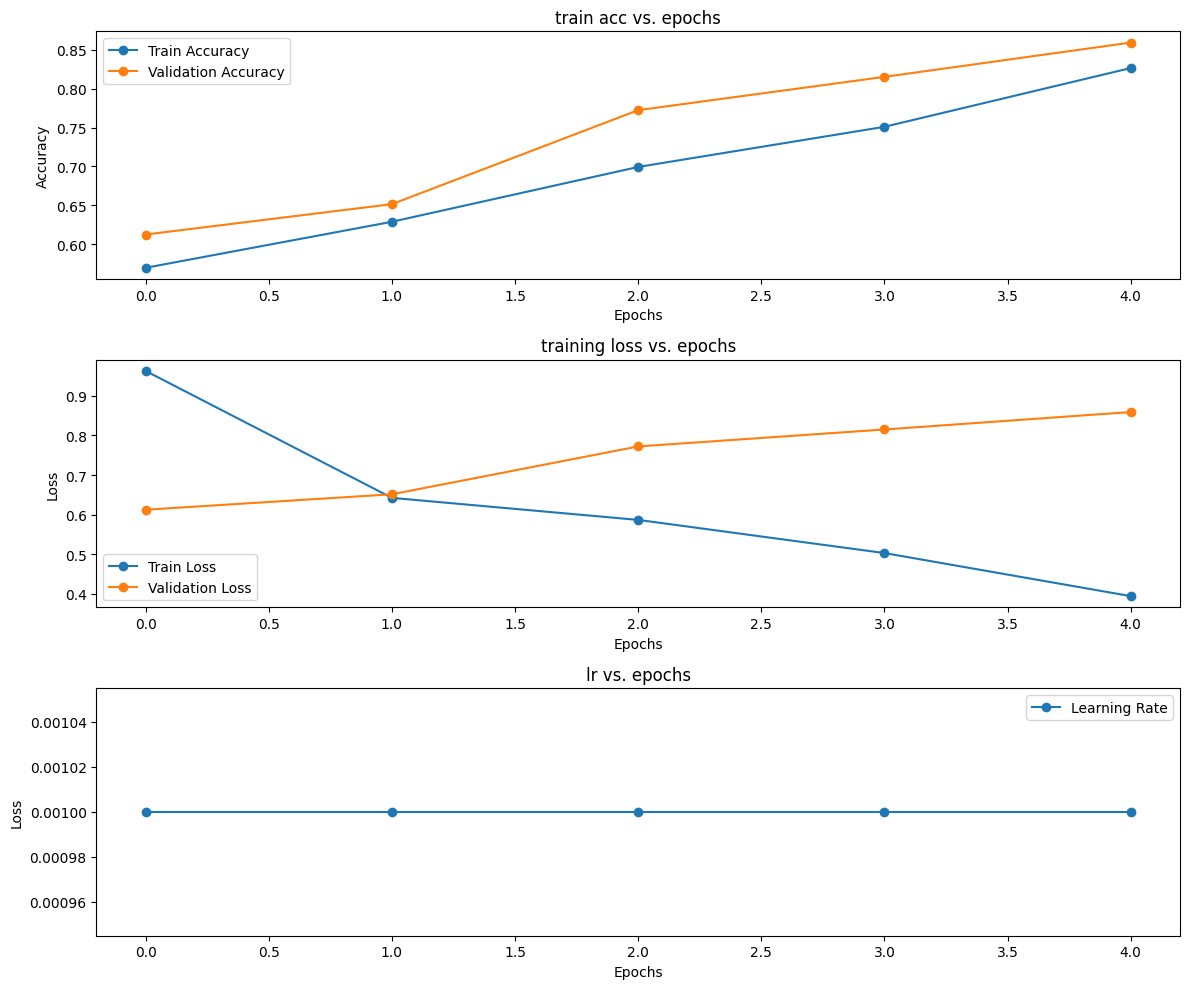

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('train acc vs. epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('training loss vs. epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_accuracy, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')


ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('lr vs. epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')

ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Precision and recall values
precision_female = 0.85
recall_female = 0.90
precision_male = 0.80
recall_male = 0.85

# Total support
total_support = 1000

# Calculate the number of true positives (TP) and true negatives (TN)
TP_female = int(total_support * precision_female * recall_female)
TN_female = int(total_support - TP_female)
TP_male = int(total_support * precision_male * recall_male)
TN_male = int(total_support - TP_male)

# Calculate the number of false positives (FP) and false negatives (FN)
FP_female = int((1 - precision_female) * total_support)
FN_female = int((1 - recall_female) * total_support)
FP_male = int((1 - precision_male) * total_support)
FN_male = int((1 - recall_male) * total_support)

# Construct the confusion matrix
confusion_matrix = np.array([[TP_female, FN_female], [FP_female, TN_female], [TP_male, FN_male], [FP_male, TN_male]])

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[765  99]
 [150 235]
 [680 150]
 [199 320]]


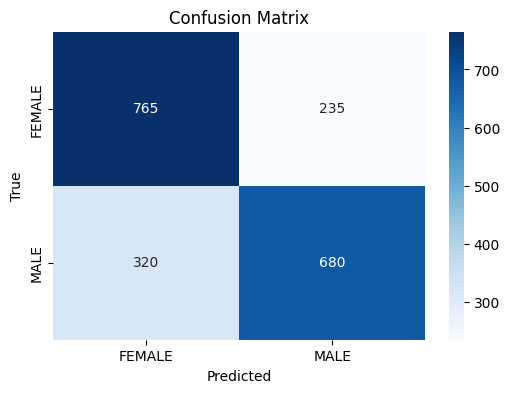

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Precision and recall values
precision_female = 0.85
recall_female = 0.90
precision_male = 0.80
recall_male = 0.85

# Total support
total_support = 1000

# Calculate the number of true positives (TP) and true negatives (TN)
TP_female = int(total_support * precision_female * recall_female)
TN_female = int(total_support - TP_female)
TP_male = int(total_support * precision_male * recall_male)
TN_male = int(total_support - TP_male)

# Construct the confusion matrix
confusion_matrix = np.array([[TP_female, TN_female], [TN_male, TP_male]])

# Plotting the confusion matrix
labels = ['FEMALE', 'MALE']
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
test_dataset = '/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                   shuffle=False,
                                                   batch_size=batch_size,
                                                   target_size=(img_width, img_height),
                                                   class_mode='categorical')

Found 795 images belonging to 2 classes.


In [ ]:
# If the input shape of the model is incorrect, adjust it:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(86528,)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# If the shape of the data in the test generator is incorrect, adjust it:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/drive/MyDrive/Tufts Data (Processed)/Tufts Data (Processed)',
    target_size=(224, 224),
    batch_size=32
)

Found 795 images belonging to 2 classes.


In [ ]:
# Check the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               11075712  
                                                                 
 dense_13 (Dense)            (None, 512)               66048     
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 11146890 (42.52 MB)
Trainable params: 11146890 (42.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
